In [19]:
import os
Rutedir = os.path.dirname(os.path.abspath('__file__'))
print(Rutedir)
print(os.path.join(Rutedir,"Inputs\cyclelist.csv"))
rute=os.path.join(Rutedir,"Inputs\cyclelist.csv")

import pandas as pd
dftessy=pd.read_csv(rute,skiprows=1,header=0,)
dftessy.head()

x:\TA-Turbine-Design-13118082
x:\TA-Turbine-Design-13118082\Inputs\cyclelist.csv


,Unnamed: 0,fluid,T_1,P_1,T_5,P_5,mflow
0,1,R245fa,360.0,0.9,335.4,0.4,0.5
1,2,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
from definitions import *
import numpy as np
import pandas as pd
print(ROOT_DIR)
global p
n=0
p=np.zeros(shape=(6, 6))
dffitfun = pd.read_csv(os.path.join(ROOT_DIR,"Inputs","fittedpolycoeffs",f"{n}.csv"),skiprows=5,usecols=range(1,7),header=0,index_col=False)
dffitfun.tail()
for i in range(0,6):
    for j in range(0,6):
        p[i][j]=dffitfun.iloc[i][j]
print(p)
print(p[5][0]*p[5][5])

x:\TA-Turbine-Design-13118082
[[ 9.  8.  7.  6.  5. 54.]
 [ 5.  0. nan nan nan nan]
 [ 4. nan  3. nan nan nan]
 [77. nan nan nan  3. nan]
 [ 4. nan nan nan nan  2.]
 [67. nan nan nan nan 69.]]
4623.0


In [139]:
import pandas as pd
import os
from ifrturbinepackage.definitions import *
import numpy as np
# gparamlist=[Rr5r4,Rb5b4,Rb4r4,RZrr4,NR]
# i=1
# dfgparams=pd.read_csv(os.path.join(ROOT_DIR,"Inputs\gparamslist.csv"),skiprows=1,header=0,index_col=0)
# dfgparams.head()
gparamlist=[[Rr5r4,'Rr5r4'],[Rb5b4,'Rb5b4'],[Rb4r4,'Rb4r4'],[RZrr4,'RZrr4'],[NR,'NR']]
dfgparams=pd.read_csv(os.path.join(ROOT_DIR,"Inputs\gparamslist.csv"),skiprows=1,header=0,index_col=0)
dfgparams.head()
for x in list(dfgparams.columns):
    print(x)
# print (np.shape(gparamlist)[0])
# k=1
# for x in range(np.shape(gparamlist)[0]):
#     gparamlist[x][0]=dfgparams.iloc[k-1][gparamlist[x][1]]
#     print(gparamlist[x][1],gparamlist[x][0])
# print(dfgparams.iloc[])

# for x in gparamlist:
#     x = dfgparams.iloc[i-1][y]

Rr5r4
Rb5b4
Rb4r4
RZrr4
NR


In [128]:
from ifrturbinepackage.definitions import *
from ifrturbinepackage.inputs import *
from ifrturbinepackage.rotor import *
from ifrturbinepackage.nozzle import *
from ifrturbinepackage.volute import *

whichcycle(10)
print(T_5)

NameError: name 'T_5' is not defined

In [134]:
dummydict={'dum':98,'dim':97}
print(dummydict['dum'])

globals().update(dummydict)
print(dum,dim)

98
98 97


In [1]:
from ifrturbinepackage.rotor import *
inlist=[1,2,3,4,5,6,7]
# global Zr
# Zr=0.05
# dum=QuasiNorm(dumlist)
translist=['b4','r4','Zr','rs5','rh5','n','Z5']
for i in range(len(translist)):
    locals()[translist[i]]=inlist[i]
print(Zr,Z5,rh5)
dum=QuasiNorm(inlist)

3 7 5
1 3


NameError: name 'Cm5' is not defined

In [4]:
zxc='dumvee'
locals()[zxc]=8
print(dumvee)
print(len(dumlist))

8
7


In [33]:
import numpy as np
import scipy as sp
import sympy as smp


In [6]:
r4,rs5,deltzr,b4,z,z5,n = smp.symbols('r4 rs5 deltzr b4 z z5 n', real = True,positive=True)
# r = rs5 + (r4-rs5)*((z-z5)/(deltzr-b4))**n
drperdz = (r4-rs5)/(deltzr-b4)**n * n * (z-z5)**(n-1)
f = smp.sqrt(1+(drperdz)**2)
smp.integrate(f,z).simplify

In [13]:
A,n,z,z5 = smp.symbols('A n z z5',real=True,positive=True)
f = smp.sqrt(1+(A*n*(z-z5)**(n-1))**2)
smp.integrate(f,z).simplify()

(2*n - 1)*(z - z5)*gamma(1 + 1/(2*(n - 1)))*hyper((-1/2, 1/(2*(n - 1))), ((2*n - 1)/(2*(n - 1)),), A**2*n**2*(z - z5)**(2*n - 2)*exp_polar(I*pi))/(2*(n - 1)*gamma(n/(n - 1) + 1 - 1/(2*(n - 1))))

In [36]:
A,z,B = smp.symbols('A z B',real=True,positive=True)
f=smp.sqrt(A**2-(z-B)**2)
smp.integrate(f,z).simplify()

Piecewise((I*(-A**2*sqrt(-A**2 + (-B + z)**2)*acosh((-B + z)/A) + A**2*(B - z) - (B - z)**3)/(2*sqrt(-A**2 + (-B + z)**2)), (B - z)**2/A**2 > 1), (-A**2*asin((B - z)/A)/2 - sqrt(A**2 - (B - z)**2)*(B - z)/2, True))

In [ ]:
# def mfun(indict,z,n) => indict : b4,r4,Zr,rs5,rh5,Z5 
# function that returns m for specific z at specic n
# divnum=10
# h   = (z-z0)/divnum
hpreset = 0.5 *10**-3
divnum  = int((z-z0)/hpreset)
h       = (z-z0)/divnum

odd = 0
even = 0
for i in range(0,divnum+1):
    zi      = z0 + i*h
    drperdz = (r4-rs5)/(Zr-b4)**n * n * (zi-z5)**(n-1)
    dmperdz = np.sqrt(1 + drperdz**2)
    if i == 0:
        fx0 = dmperdz
    if i%2 != 0 and i<=divnum-1:
        odd += dmperdz
    if i%2 == 0 and i<=divnum-2:
        even += dmperdz
    if i == divnum:
        fxn = dmperdz

m = (z-z0)*(fx0 + 4*odd + 2*even + fxn)/(3*divnum)    

# return m

In [ ]:
# def rfun(indict,z,n) => indict b4,r4,Zr,rs5,rh5,Z5
xi  = (z-z5)/(Zr-b4)
r   = rs5 + (r4-rs5)*xi**n


# def phi
drperdz = (r4-rs5)/(Zr-b4)**n * n * (z-z5)**(n-1)
dmperdz = np.sqrt(1 + drperdz**2)
phi     = drperdz/dmperdz


In [ ]:
for i in range(-5,10+1):
    if i%2==0:
        print(f"{i} is even")
    if i%2!=0:
        print(f"{i} is odd")
    if i%2==0 and i%3==0:
        print(f"{i} is even and 3 is factor of it")

In [38]:
x=5
if x<=7 and x%2!=0 and x>=6:
    print(x)

In [64]:
from sympy import symbols,Eq,solve

In [55]:
x,y= symbols('x y',real=True,positive=True)
eq1= Eq(1-x+10*((y-3)/(4))**5,0)
eq2= Eq(1/3*(x-1)+3-y,0)
sol= solve((eq1,eq2),(x,y))
print(sol)


[(1.00000000000000, 3.00000000000000), (13.5596216727053, 7.18654055756842)]


In [82]:
nesteddumlist = [(1,4),(8,9),(10,3),(1,-1),(-3,-4)]
filtered      = [take for take in nesteddumlist if take[0]>9 and take[1]<4]
print(filtered)


[(10, 3)]


In [6]:
def dumfun(alpha):
    beta    = alpha**2
    gamma   = beta**alpha
    outputdict=dict()
    for i in ('beta','gamma'):
        outputdict[i]   = locals()[i]
    return outputdict

imp=dumfun(4)
locals().update(imp)
print(gamma)


65536


In [48]:
''' 
Just docstring
mind no time
'''
# dumlist = [[],[]]

alist,blist,clist,dlist,dumlist = ([[]for i in range(0,9+1)] for i in range(5))
# dumlist = [[]for i in range(0,9+1)]
dumlist[0].append('dum')
dumlist[1].append('dim')
dumlist[1].append('dam')
print(dumlist)

[['dum'], ['dim', 'dam'], [], [], [], [], [], [], [], []]


In [58]:

dumdict = {'A':3,'B':5}
dimdict = dumdict.copy()
dimdict['yoho']=89
dimdict['A']=420
print(dumdict,dimdict)
alist=[1,[2,9],3,4,5]
blist=alist.copy()
blist[1]=[99,100]
print(alist,blist)

{'A': 3, 'B': 5} {'A': 420, 'B': 5, 'yoho': 89}
[1, [2, 9], 3, 4, 5] [1, [99, 100], 3, 4, 5]


In [60]:
import copy
  
# initializing list 1
li1 = [1, 2, [3,5], 4]
  
# using copy to shallow copy 
li2 = copy.copy(li1)
  
# original elements of list
print ("The original elements before shallow copying")
for i in range(0,len(li1)):
    print (li1[i],end=" ")
  
print("\r")

# adding and element to new list
li2[2][0] = 7
  
# checking if change is reflected
print ("The original elements after shallow copying")
for i in range(0,len( li1)):
    print (li1[i],end=" ")

The original elements before shallow copying
1 2 [3, 5] 4 
The original elements after shallow copying
1 2 [7, 5] 4 

In [8]:
import pandas as pd
alist = ['avalon','vega','horakh']
blist = [99,100,101]
datadum = {
    'name': alist,
    'value': blist
}
dfdum = pd.DataFrame(datadum)
selhead = ['name']
dfdum.to_csv("testo.txt",columns=selhead,index=None,header=None,sep=' ',mode='w')

In [19]:
x,y=symbols('x y',real=True,positive=True)
eq1 = Eq(y-x**2,0)
eq2 = Eq(x+y-5,0)
sol = solve((eq1,eq2),(x,y))
print(sol)

[(-1/2 + sqrt(21)/2, 11/2 - sqrt(21)/2)]


In [31]:
def dumfun():
    dumfun.vara     = 3
    return dumfun.vara
dumfun()
dumfun.vara

3

In [17]:
from time import sleep
seconds = 10
for i in range (seconds+1):
    print(f"\x1b[2KCounting down...({seconds-i}s)",end="\r")
    sleep(1)


In [4]:
def lengthunitconverter(unitfrom:str,unitto:str,value):
    
    ''' conversion ratios of units to m '''
    conratdict={
        'm'         : 1,
        'km'        : 1000,
        'mi'        : 1609.34,
        'Angstrom'  : 1e-10,
        'inch'      : 0.0254,
        'nm'        : 1e-9,
        'micrometer': 1e-6
    }

    return conratdict[unitfrom]/conratdict[unitto] * value

lengthunitconverter('km','mi',1)

0.6213727366498067

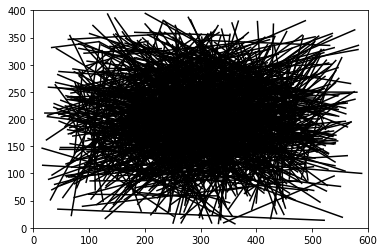

In [62]:
import matplotlib
import matplotlib.pyplot as plt    
import random


s = (600,400)
N = 1000

segs = []
colors = []
my_cmap = plt.get_cmap('jet')
for i in range(N):
    x1 = random.triangular() * s[0]
    y1 = random.triangular() * s[1]
    x2 = random.triangular() * s[0]
    y2 = random.triangular() * s[1]
    c  = random.triangular()
    colors.append(my_cmap(c))
    segs.append(((x1, y1), (x2, y2)))

ln_coll = matplotlib.collections.LineCollection(segs, colors='black')

ax = plt.gca()
ax.add_collection(ln_coll)
ax.set_xlim(0, 600)    
ax.set_ylim(0, 400)
plt.draw()

In [2]:
np.degrees(-0.5235987611273675)

-29.999999170876706

In [7]:
GetGParams(coeffs=[1.2,16],mflows=2)

{'success': True,
 'Effts': -87.37352341754485,
 'gparams': array([ 0.3337893 ,  2.03538925,  0.18059377,  0.75      , 10.00000708])}

In [2]:
GetCoeffs(gparams=[ 0.26339919,  1.19392278,  0.18996068,  0.75,       10.        ],mflows=2)

{'success': False,
 'Effts': -75.46907338246257,
 'coeffs': array([ 1.        , 13.41692614])}

In [2]:
ComputeR4all(16,1,[1.2,16],[ 0.26339919,  1.19392278,  0.18996068,  0.75,       10.        ])

{'geometry': {'r4': 0.05580635074536877,
  'r5': 0.01469934758318603,
  'rs5': 0.021027742642637272,
  'rh5': 0.00837095252373479,
  'b4': 0.010601012335908759,
  'b5': 0.012656790118902481,
  'Zr': 0.04185476305902658,
  'NR': 10.0,
  'tb4': 0.002232254029814751,
  'tb5': 0.0011161270149073754},
 'thermo': {'T_1': 373.15,
  'T_5': 320.5349633929803,
  'P_1': 1250000.0,
  'P_5': 212000.0,
  'p04s': 1250000.0,
  'p04': 1106868.5532135018,
  'p4s': 298937.2488995157,
  'p4': 270068.86576097907,
  'p5ss': 165532.1683673223,
  'p5': 512196.8325715784,
  'p05ss': 212000.0,
  'p05': 212000.0,
  'T05ss': 320.5349633929803,
  'T05': 327.0975990785429,
  'T5ss': 314.46397016252433,
  'T5': 343.9582796758057,
  'rho4s': 15.867694372950627,
  'rho5ss': 8.93034899179223,
  'mflow': 1,
  'h4s': 449772.0925604543,
  'h04s': 476321.0623854738},
 'velocity': {'C4': 230.4299018140639,
  'Ct4': 229.78453906664927,
  'Cm4': 17.233840429998693,
  'W4': 87.87568864670762,
  'U4': 143.6153369166558,
  'Alph

In [2]:
np.degrees(-1.3359)

-76.54143185152668

In [1]:
from ifrturbinepackage.definitions  import *
from ifrturbinepackage.inputs       import *
from ifrturbinepackage.rotor        import *
from ROptimize                      import *

import matplotlib.pyplot as plt

cyclenum = int(input("which cycle #?: "))

optresR = optimizeR(cyclenum)
# askproceed = str(input("proceed? [Y/N]"))
# if askproceed.upper() == 'Y' or askproceed.upper() == 'YES':
R2DContour  = Gen2DContour(indict=optresR,z5=0,dataamount=70)

# plot1   = plt.plot(R2DContour['zh_data'],R2DContour['rh_data'])
# plot1   = plt.plot(R2DContour['zs_data'][4],R2DContour['rs_data'][4])
# plt.show()


Iteration 0 : True Effts = 64.39181458341403 %
Iteration 1 : Effts = 83.80212564091724 % 
mflow       : True 1.999994473977962 
coeffssol   : True [ 1.23747946 13.39994685]
gparams     : True [ 0.28652058  2.17496106  0.12532096  0.7500008  10.000035  ] 
Iteration 2 : Effts = 83.80496958821908 % 
mflow       : True 1.999994473977962 
coeffssol   : True [ 1.23748199 13.39995383]
gparams     : True [ 0.28698235  2.18169378  0.12532052  0.75000028 10.00001312] 
Iteration 3 : Effts = 83.81179725992455 % 
mflow       : True 1.9999944217065149 
coeffssol   : True [ 1.23748715 13.39996799]
gparams     : True [ 0.28797814  2.20198801  0.1253205   0.75000037 10.00001489] 
Optimized result for cycle 10 :
geometry
{'r4': 0.05000000444838358, 'r5': 0.014398908182378125, 'rs5': 0.02129776497467392, 'rh5': 0.007500051390082332, 'b4': 0.00626602575990868, 'b5': 0.01379771358459159, 'Zr': 0.03750002195440622, 'NR': 10.000014888426461, 'tb4': 0.002000000177935343, 'tb5': 0.0010000000889676716}
thermo
{

In [2]:
optresR

{'Beta4': -1.359541347560515,
 'Beta5': 0.9454392624455014,
 'b4': 0.0057975066144574,
 'r4': 0.050000031422630264,
 'Zr': 0.03750002356708402,
 'rs5': 0.023141325769071314,
 'rh5': 0.003999999981810949,
 'r5': 0.013570662875441132,
 'b5': 0.019141325787260365,
 'tb4': 0.0020000012569052106,
 'tb5': 0.0010000006284526053}

In [ ]:
import matplotlib.pyplot as plt

plotkeun = []
for i in range(0,10):
    plotkeun.append(0)
for i in range(2,9+1):
    plotkeun[i] = plt.figure(dpi=120)
    plotkeun[i] = plt.plot(R2DContour['zh_data'],R2DContour['rh_data'],color='b')
    plotkeun[i] = plt.plot(R2DContour['zs_data'][i],R2DContour['rs_data'][i],color='r')
    plotkeun[i] = plt.gca().set_aspect('equal', adjustable='box')
    plotkeun[i] = plt.xlabel("z (mm)")
    plotkeun[i] = plt.ylabel("r (mm)")
    plotkeun[i] = plt.title("Rotor 2D Contour")
# plot1 = plt.figure(dpi=120)
# plot1 = plt.plot(R2DContour['zh_data'],R2DContour['rh_data'],color='b')
# plot1 = plt.plot(R2DContour['zs_data'][4],R2DContour['rs_data'][4],color='r')
# plot1 = plt.gca().set_aspect('equal', adjustable='box')
# plot1 = plt.xlabel("z (mm)")
# plot1 = plt.ylabel("r (mm)")
# plot2 = plt.figure(dpi=120)
# plot2 = plt.plot(R2DContour['zh_data'],R2DContour['rh_data'],color='b')
# plot2 = plt.plot(R2DContour['zs_data'][4],R2DContour['rs_data'][4],color='r')
# plot2 = plt.gca().set_aspect('equal', adjustable='box')
# plot2 = plt.xlabel("z (mm)")
# plot2 = plt.ylabel("r (mm)")

# plt.figure(dpi=80)
plt.show(plotkeun[4])

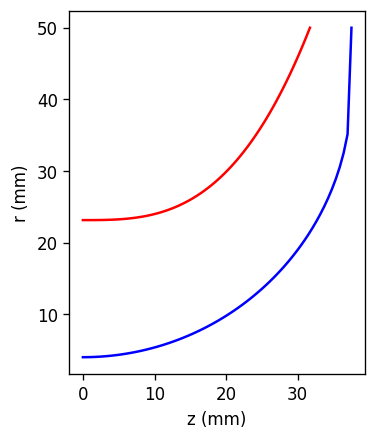

In [4]:
plot1 = plt.figure(dpi=120)
plot1 = plt.plot(R2DContour['zh_data'],R2DContour['rh_data'],color='b')
plot1 = plt.plot(R2DContour['zs_data'][3],R2DContour['rs_data'][3],color='r')
plot1 = plt.gca().set_aspect('equal', adjustable='box')
plot1 = plt.xlabel("z (mm)")
plot1 = plt.ylabel("r (mm)")
# plt.show(plot1)

In [ ]:
import matplotlib.pyplot as plt

figplot,axn = plt.subplots(2,2,dpi=100)

plt.add_
axn[0,0].plot(R2DContour['zh_data'],R2DContour['rh_data'],color='b')
axn[0,0].plot(R2DContour['zs_data'][2],R2DContour['rs_data'][2],color='r')

axn[0,1].plot(R2DContour['zh_data'],R2DContour['rh_data'],color='b')
axn[0,1].plot(R2DContour['zs_data'][4],R2DContour['rs_data'][4],color='r')

axn[1,0].plot(R2DContour['zh_data'],R2DContour['rh_data'],color='b')
axn[1,0].plot(R2DContour['zs_data'][6],R2DContour['rs_data'][6],color='r')

axn[1,1].plot(R2DContour['zh_data'],R2DContour['rh_data'],color='b')
axn[1,1].plot(R2DContour['zs_data'][7],R2DContour['rs_data'][7],color='r')

plt.show()

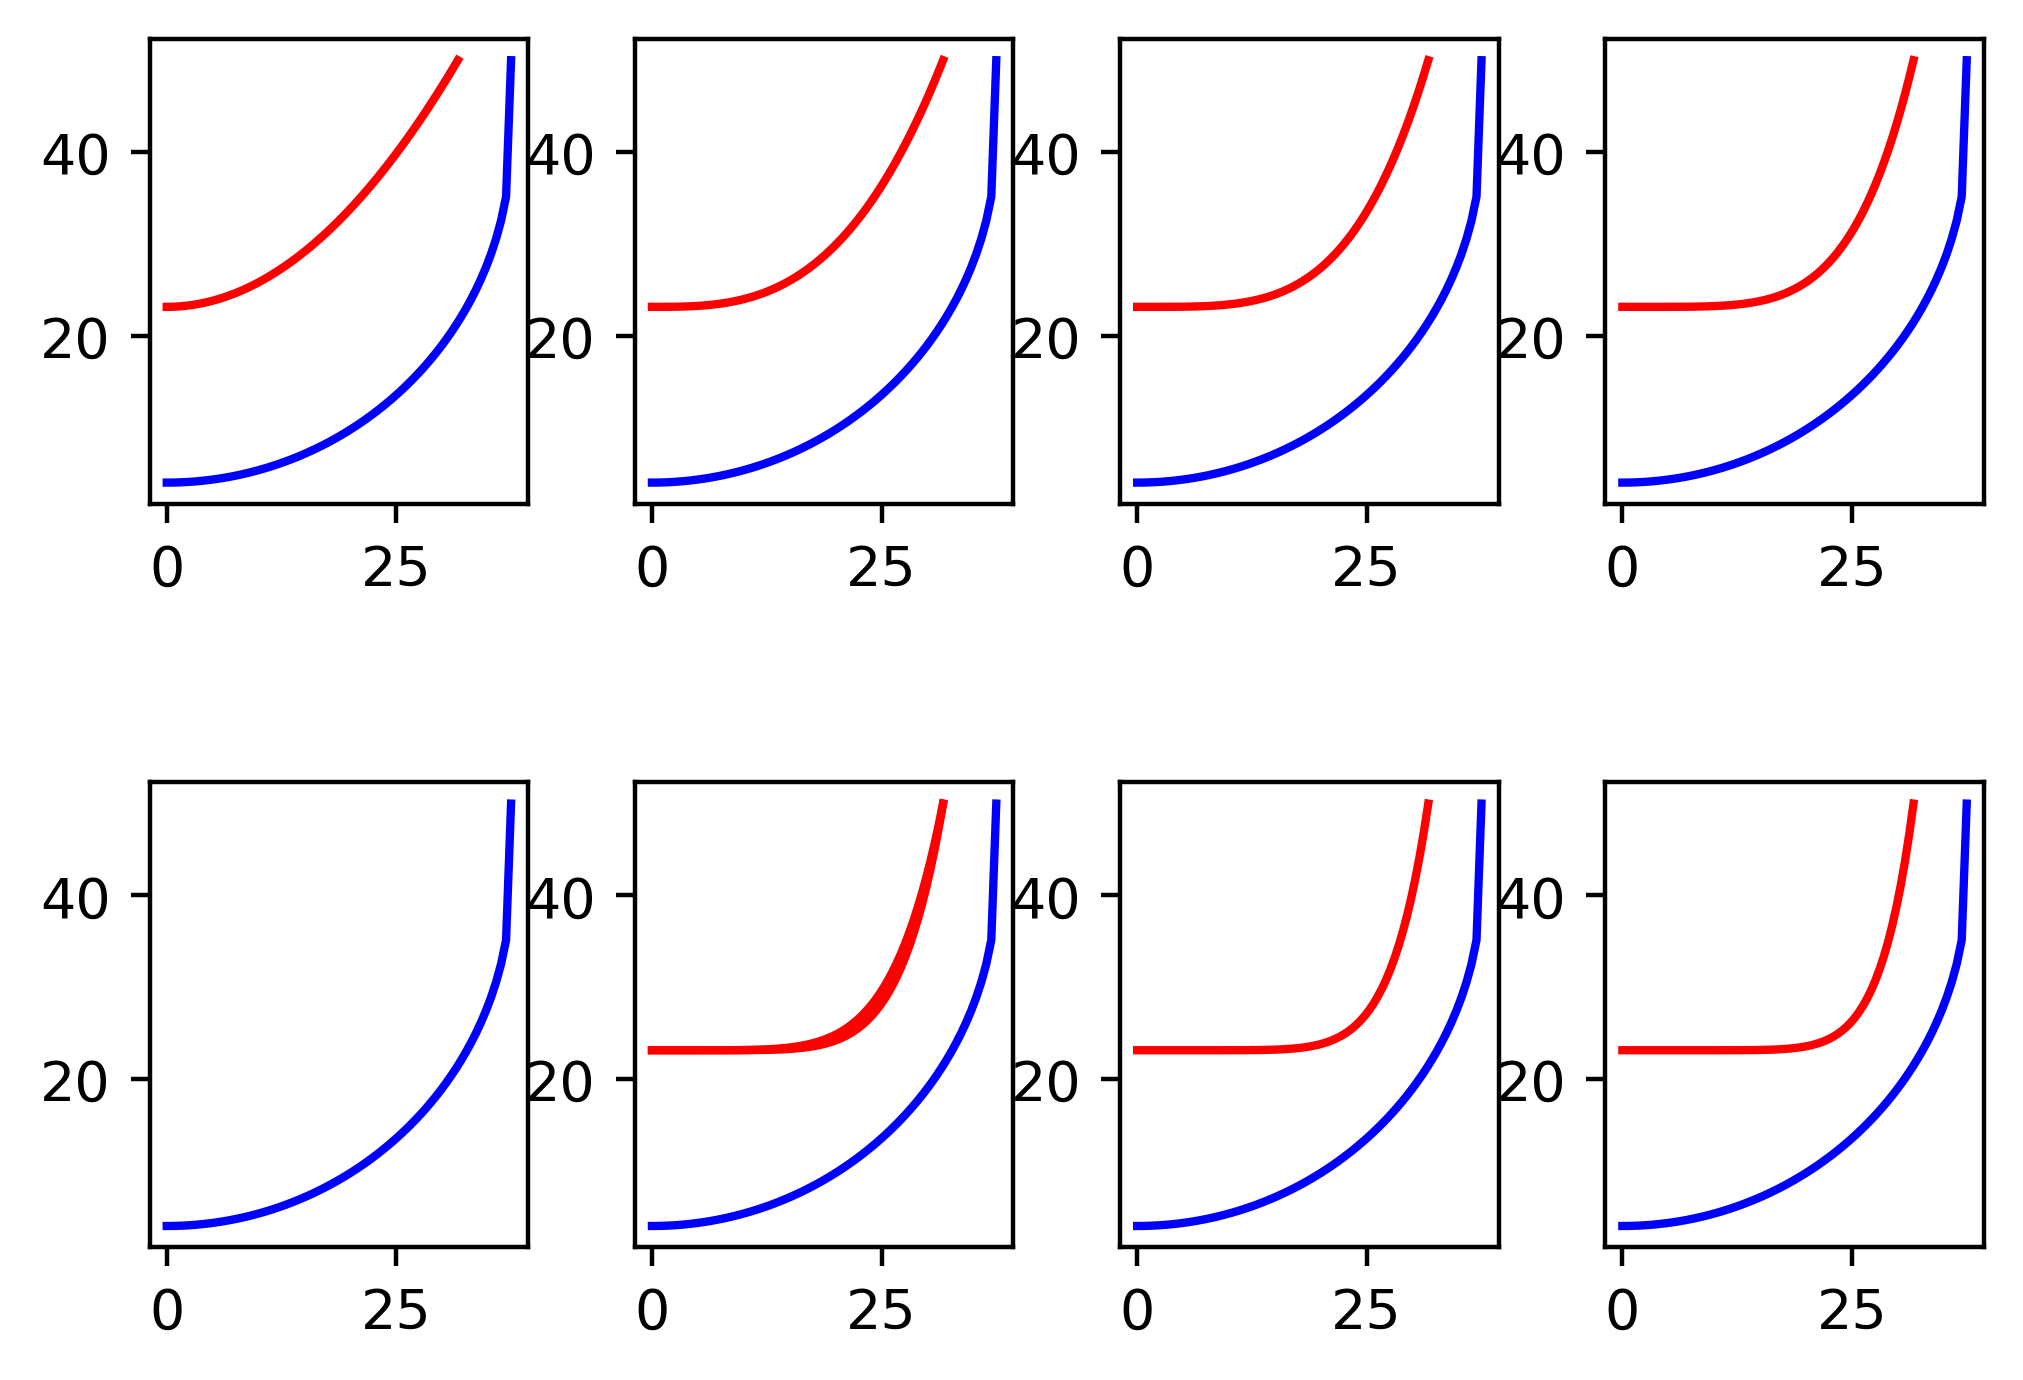

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(dpi=400)

plot2 = fig.add_subplot(2,4,1, adjustable='box', aspect='equal')
plot3 = fig.add_subplot(2,4,2, adjustable='box', aspect='equal')
plot4 = fig.add_subplot(2,4,3, adjustable='box', aspect='equal')
plot5 = fig.add_subplot(2,4,4, adjustable='box', aspect='equal')
plot6 = fig.add_subplot(2,4,5, adjustable='box', aspect='equal')
plot7 = fig.add_subplot(2,4,6, adjustable='box', aspect='equal')
plot8 = fig.add_subplot(2,4,7, adjustable='box', aspect='equal')
plot9 = fig.add_subplot(2,4,8, adjustable='box', aspect='equal')

plot2.plot(R2DContour['zh_data'],R2DContour['rh_data'],color='b')
plot2.plot(R2DContour['zs_data'][2],R2DContour['rs_data'][2],color='r')
plot3.plot(R2DContour['zh_data'],R2DContour['rh_data'],color='b')
plot3.plot(R2DContour['zs_data'][3],R2DContour['rs_data'][3],color='r')
plot4.plot(R2DContour['zh_data'],R2DContour['rh_data'],color='b')
plot4.plot(R2DContour['zs_data'][4],R2DContour['rs_data'][4],color='r')
plot5.plot(R2DContour['zh_data'],R2DContour['rh_data'],color='b')
plot5.plot(R2DContour['zs_data'][5],R2DContour['rs_data'][5],color='r')
plot6.plot(R2DContour['zh_data'],R2DContour['rh_data'],color='b')
plot7.plot(R2DContour['zs_data'][6],R2DContour['rs_data'][6],color='r')
plot7.plot(R2DContour['zh_data'],R2DContour['rh_data'],color='b')
plot7.plot(R2DContour['zs_data'][7],R2DContour['rs_data'][7],color='r')
plot8.plot(R2DContour['zh_data'],R2DContour['rh_data'],color='b')
plot8.plot(R2DContour['zs_data'][8],R2DContour['rs_data'][8],color='r')
plot9.plot(R2DContour['zh_data'],R2DContour['rh_data'],color='b')
plot9.plot(R2DContour['zs_data'][9],R2DContour['rs_data'][9],color='r')

fig.subplots_adjust(hspace=0.6)
plt.show()


In [ ]:
from scipy.interpolate import interp1d

In [51]:
tesinterp=interp1d(R2DContour['zs_data'][4],R2DContour['rs_data'][4],'linear')

tesinterp(25)
# R2DContour['rs_data'][5]

array(33.53295827)

In [2]:
from ifrturbinepackage.definitions  import *
from ifrturbinepackage.inputs       import *
from ifrturbinepackage.rotor        import *
from ROptimize                      import *

In [3]:
ComputeR4all(cyclenum=10,mflows=1.999994473977962,coeffs=[ 1.45257423, 15.01877936],gparams=[  0.25600783 , 3.03592877,  0.11594997,  0.75       ,11.         ])

{'geometry': {'r4': 0.05780775700159639,
  'r5': 0.014799238427145998,
  'rs5': 0.024973861780225544,
  'rh5': 0.0046246150740664495,
  'b4': 0.006702807690102392,
  'b5': 0.020349246706159094,
  'Zr': 0.04335581775119729,
  'NR': 11.0,
  'tb4': 0.0023123102800638555,
  'tb5': 0.0011561551400319277},
 'thermo': {'T_1': 353.0,
  'T_5': 318.8811419571459,
  'P_1': 3714700.0,
  'P_5': 2293400.0,
  'p04s': 3714700.0,
  'p04': 3589080.49824752,
  'p4s': 2584694.14219078,
  'p4': 2499723.8590645376,
  'p5ss': 2279208.0807944876,
  'p5': 2902589.8619850064,
  'p05ss': 2293400.0,
  'p05': 2293400.0,
  'T05ss': 318.8811419571459,
  'T05': 320.6971338169347,
  'T5ss': 318.4638909604171,
  'T5': 335.1351808458841,
  'rho4s': 67.7552698251539,
  'rho5ss': 60.76375530969978,
  'mflow': 1.999994473977962,
  'h4s': 533694.7998203858,
  'h04s': 547865.6018214751},
 'velocity': {'C4': 168.34964806075095,
  'Ct4': 167.56773991864574,
  'Cm4': 16.206681977993124,
  'W4': 58.293768187006094,
  'U4': 111.5

In [8]:
R2DContour['rh5']

3.9999999818109493

In [6]:
def ComputeR4alldum(cyclenum,mflows,coeffs:list,gparams:list) -> 'Effts':

    global T_1,T_5,P_1,P_5,p04s,p04,p4s,p4,p05ss,p5ss,p05,p5,T05ss,T05,T5ss,T5,rho4s,rho5ss,mflow,h4s,h04s
    global r4,r5,rs5,rh5,b4,b5,Zr,NR,tb4,tb5
    global C4,Ct4,Cm4,W4,U4,Alpha4,Beta4,C5,Ct5,Cm5,W5,U5,Alpha5,Beta5,Beta4opt,Beta4opt2
    global Cm5didconverge1,Cm5didconverge2,k1Cm5,k2Cm5,errorC5,Ma4s,rpm
    global TotalLoss,LossInc,LossInc0,LossPass,LossTip,LossWind,LossTE,LossExit,S5,O5,Effreductbladeloading
    global Effts,Efftt,Efftspred,Reaction,vNu
    global Beta4,Beta5,b4,r4,Zr,rs5,rh5
    global Bk4,Bk5
    cycledict=whichcycle (cyclenum)       # The cycle to be computed
    globals().update(cycledict)
    mflow   = mflows
    tenflow_coeff   = coeffs[0]
    tenwork_coeff   = coeffs[1]
    Rr5r4   = gparams[0]
    Rb5b4   = gparams[1]
    Rb4r4   = gparams[2]
    RZrr4   = gparams[3]
    NR      = gparams[4]
    flow_coeff=tenflow_coeff/10
    work_coeff=tenwork_coeff/10
    # cycledict=whichcycle (cyclenum)       # The cycle to be computed
    # globals().update(cycledict)
    
    # gparamdict=whichgparamset (l)  # geometry parameter set to be used is the l
    # globals().update(gparamdict)
    # rpm =whatrpm(m)          # rpm at m will be used
    # P_1 = P_1*10**6   sudah diubah jadi pa di fungsi whichcycle
    # P_5 = P_5*10**6
    Cp4 = Props('C','T',T_1,'P',P_1,fluid)
    Cv4 = Props('O','T',T_1,'P',P_1,fluid)
    gamma = Cp4/Cv4
    Rx = 8.31446261815324   #J/K.mol
    #General Properties inlet outlet turbin (Total)
    H_1     = Props('H','T',T_1,'P',P_1,fluid)     #J/kg
    s01     = Props('S','T',T_1,'P',P_1,fluid)     #J/kg.K 
    T_5     = Props('T','P',P_5,'S',s01,fluid)  # =>asumsi nozzle isenthalpy DAN Isentropic
    H_5     = Props('H','T',T_5,'P',P_5,fluid)  # meski pada kenyataannya isenthalpic nozzle tidak isentropic
    DeltaH  = H_1-H_5            #Ideal === Isentropic Total Enthalpy change 
    C0s     = np.sqrt(2*DeltaH)         #Spouting Velocity
    #Perhitungan Properties ideal lain (Total)
    p01     = P_1           #inlet volute [1], Total
    T01     = T_1
    h01     = H_1
    p1      = p01           # inlet turbine, V~0 
    T1      = T_1
    h01     = H_1
    rho1   = Props('D','P',p1,'T',T1,fluid)
    h02s    = H_1           #inlet nozzle [2], Total
    s02s    = s01            #ideal volute === approx. as isentropic
    p02s    = p01
    T02s    = T01
    h03s    = h02s           #outlet nozzle [3], Total
    s03s    = s02s            #ideal nozzle === approx. as isentropic (in Total)
    p03s    = p02s
    T03s    = T02s
    h04s    = h03s           #inlet rotor [4], Total
    s04s    = s03s           #outlet nozzle === inlet rotor
    p04s    = p03s
    T04s    = T03s
    h04     = h04s          # Nozzle isenthalpic but not isentropic
    p05ss   = P_5
    T05ss   = T_5
    h05ss   = H_5
    s05ss   = s04s
    #Segitiga Kecepatan Inlet, m/s, radians
    U4      = np.sqrt(DeltaH/work_coeff)
    Cm4     = U4*flow_coeff
    Ct4     = DeltaH/U4                 # => DeltaH = U4*Ct4-U5*Ct5 ; Alpha5=0 => Ct5=0
    C4      = np.sqrt(Cm4**2+Ct4**2)
    Alpha4  = np.arctan(Ct4/Cm4) 
    W4      = np.sqrt(Cm4**2+(U4-Ct4)**2)
    Beta4   = np.arctan((U4-Ct4)/Cm4)
    h4s    = h04s-1/2*C4**2
    rho4s   = Props('D','H',h4s,'S',s04s,fluid)
    rho05ss = Props('D','H',h05ss,'S',s05ss,fluid)
    a4      = Props('A','H',h4s,'S',s04s,fluid)
    Ma4s    = C4/a4
    initr4guess=0.045 # => initial guess r4 = 4.5cm
    r40     = initr4guess
    r4      = 0.04  # => set asal untuk memulai loop
    while np.abs(r40-r4)/r40 > 0.01: # residual/error harus lebih kecil dari 1%
        r40     = r4
        if 0.04*r4>0.001:
            tb4 = 0.04*r4
        else:
            tb4 = 0.001
        Bk4     = (tb4*NR)/(2*np.pi*r40*np.cos(Beta4))
        r4      = np.sqrt(mflow/(2*np.pi*Rb4r4*Cm4*rho4s*(1-Bk4))) # mflow sebagai input
    angvel  = U4/r4
    rpm     = angvel*(60/(2*np.pi))
    r5      = Rr5r4*r4
    b4      = Rb4r4*r4
    b5      = Rb5b4*b4
    rs5     = (2*r5+b5)/2
    rh5     = rs5-b5
    if 0.02*r4>0.001:
        tb5 = 0.02*r4
    else:
        tb5 = 0.001
    Ct5 = 0 # => it is predetermined that Alpha5=0
    Alpha5 = 0
    Cm5_0    = 10
    rho5ss_0= rho05ss        # => initial value for iteration
    Cm5ii    = Cm5_0
    rho5ssii= rho5ss_0
    Cm5didconverge1 = False
    Cm5didconverge2 = False
    choked5     = False
    k1Cm5    = 0
    k2Cm5    = 0
    while Cm5didconverge1 == False:
        k1Cm5       = k1Cm5+1             # => iteration amount
        Cm5i        = Cm5ii
        rho5ssi      = rho5ssii
        C5      = np.sqrt(Cm5i**2+Ct5**2)
        U5      = U4*Rr5r4
        W5      = np.sqrt(Cm5i**2+(U5-Ct5)**2)
        Beta5   = np.arccos(Cm5i/W5)
        Bk5     = (tb5*NR)/(2*np.pi*r5*np.cos(Beta5))
        Cm5ii       = (1/(Rb5b4*Rr5r4))*(rho4s/rho5ssi)*(1-Bk4)/(1-Bk5) *Cm4
        # Cm4ii       = mflow/(2*np.pi()*b5*)
        h5ss         = h05ss-1/2*(Cm5ii**2+Ct5**2)
        rho5ssii     = Props('D','H',h5ss,'S',s05ss,fluid)
        errorCm5    = np.abs((Rb5b4*Rr5r4*(rho5ssii/rho4s)*(Cm5ii/Cm4)*((1-Bk5)/(1-Bk4)))-1)
        # errorCm4    = mflow/(rho5ssii*Cm4ii*2*np.pi*b4*r4)-1
        if errorCm5 <= 5*1e-3:
            Cm5didconverge1 = True
            Cm5didconverge2 = True
            Cm5     = Cm5ii
            rho5ss   = rho5ssii
            break
        if (rho5ssi*Cm5i-rho5ssii*Cm5ii)*(Cm5i-Cm5ii)<0:
            Cm5      = Cm5ii
            rho5ss  = rho5ssii
            break
        if k1Cm5>200:
            print(f"loop1 iterates too long ({k1Cm5}) at {flow_coeff,work_coeff} with errorCm5 = {errorCm5}")
            break
    while Cm5didconverge2 == False:
        k2Cm5     = k2Cm5 +1         # => iteration amount
        
        C5      = np.sqrt(Cm5**2+Ct5**2)
        U5      = U4*Rr5r4
        W5       = np.sqrt(Cm5**2+(U5-Ct5)**2)
        Beta5   = np.arccos(Cm5/W5)
        Bk5     = (tb5*NR)/(2*np.pi*r5*np.cos(Beta5))
        Cm5       = (1/(Rb5b4*Rr5r4))*(rho4s/rho5ss)*(1-Bk4)/(1-Bk5) *Cm4 # -_- -_- -_-
        h5ss       = h05ss-1/2*(Cm5**2+Ct5**2)
        rho5ss     = Props('D','H',h5ss,'S',s05ss,fluid)
        if np.abs(1-Cm5/Props('A','H',h5ss,'S',s05ss,fluid)) < 5*1e-3:
            choked5 = True
            break
        errorCm5  = np.abs((Rb5b4*Rr5r4*(rho5ss/rho4s)*(Cm5/Cm4)*((1-Bk5)/(1-Bk4)))-1)
        if errorCm5 <= 5*1e-5:
            Cm5didconverge2 = True
            break
        if k2Cm5>200:
            print(f"loop2 iterates too long ({k1Cm5},{k2Cm5}) at {flow_coeff,work_coeff} with errorCm5 = {errorCm5}")
            break
    h5ss    = h05ss-1/2*(Cm5**2+Ct5**2)
    C5      = np.sqrt(Cm5**2+Ct5**2)
    U5      = U4*Rr5r4
    W5      = np.sqrt(Cm5**2+(U5-Ct5)**2)
    Beta5   = np.arccos(Cm5/W5)
    #Perhitungan geometri
    # r4      = U4/np.radians(rpm*6)
    # r4      = np.sqrt(mflow/(2*np.pi*Rb4r4*Cm4*rho4s)) # mflow sebagai input
    # angvel  = U4/r4
    # rpm     = angvel*(60/(2*np.pi))
    # r5      = Rr5r4*r4
    # b4      = Rb4r4*r4
    # b5      = Rb5b4*b4
    # rs5     = (2*r5+b5)/2
    # rh5     = rs5-b5
    # if rh5 < 0.0015:
    #     print(f"For flow coeff ={flow_coeff} and work coeff={work_coeff} rh5 too small(<1.5mm), adjust gparams")
    
    Zr      = RZrr4*r4
    # mflow   = 2*np.pi*b5*r5*rho5ss*Cm5
    Q5      = mflow/rho05ss
    ns      = np.radians(rpm*6)*np.sqrt(Q5)/DeltaH**0.75
    Efftspred    = 0.81-1.07*(ns-0.55)**2-0.5*(ns-0.55)**3       #predicted total-to-static efficiency
    p04     = p01-rho1*DeltaH*(1-Efftspred)/4
    T04     = Props('T','P',p04,'H',h04s,fluid)
    s04     = Props('S','P',p04,'T',T04,fluid)
    #Perhitungan Properties ideal lain (Static)
    h4s     = h04s-1/2*C4**2
    p4s     = Props('P','H',h4s,'S',s04s,fluid)
    p4      = Props('P','H',h4s,'S',s04,fluid)
    T4s     = Props('T','H',h4s,'S',s04s,fluid)
    rho04s  = Props('D','P',p04s,'T',T04s,fluid)
    rho4s   = Props('D','P',p4s,'T',T4s,fluid)
    rho4sm  = 2*(p04s-p4s)/C4**2
    h4      = h04-1/2*C4**2
    p4      = Props('P','H',h4,'S',s04,fluid)
    T4      = Props('T','H',h4,'S',s04,fluid)
    rho04   = Props('D','P',p04,'T',T04,fluid)
    rho4    = Props('D','P',p4,'H',h04,fluid)
    rho4m   = 2*(p04-p4)/C4**2
    # a01     = Props('A','P',p01,'T',T01,fluid)
    # a4s     = Props('A','P',p4s,'T',T4s,fluid)
    # a4      = Props('A','P',p4,'T',T4,fluid)
    # Ma4s    = C4/a4s
    # Ma4     = C4/a4
    T5ss    = Props('T','H',h5ss,'S',s05ss,fluid)
    p5ss    = Props('P','H',h5ss,'S',s05ss,fluid)
    Re4s    = rho4s*C4*b4/Props('V','P',p4s,'T',T4s,fluid)
    Re4     = rho4*C4*b4/Props('V','P',p4,'T',T4,fluid)
    S5      = 2*np.pi*r5/NR
    O5      = S5*Cm5/W5
    p5ss    = Props('P','H',h5ss,'S',s05ss,fluid)
    a5ss    = Props('A','H',h5ss,'P',p5ss,fluid)
    Ma5ss   = C5/a5ss
    # \\\\\\\ <<---------<<----||----->>------------>> ////////
    ## Losses Coefficient ##
    #Rotor Incidence Losses 
    Beta4opt2= np.arctan((-1.98/NR)/(1-1.98/NR)*np.tan(Alpha4))
    Beta4opt = np.arctan(np.tan(Alpha4)*(work_coeff-1+2/NR)/work_coeff)  #(Chen)
    LossInc0 = 0.5*(W4**2)*(np.sin(np.abs(np.abs(Beta4)-np.abs(Beta4opt))))**2  #m2/s2
    LossInc  = 0.5*(W4**2)*(np.sin(Beta4)-np.sin(Beta4opt))**2
    #Blade loading efficiency (Chen)
    vNu = U4/np.sqrt(2*Cp4*T01*(1-(p5ss/p01)**((gamma-1)/gamma))) #blade/isentropic jet speed ratio
    Effreductbladeloading = flow_coeff**2*vNu**2
    #Rotor Passage Losses ([Uusitalo] from Moustapha PLM3)
    LH = np.pi/4*((Zr-b4/2)+(r4-rh5-b5/2))                                                              #m
    DH = 0.5*((4*np.pi*r4*b4/(2*np.pi*r4+Zr*rh5))+((2*np.pi*(rs5**2-rh5**2)/(np.pi*(rs5-rh5))+Zr*b5)))  #m
    Y5 = np.arctan(0.5*(np.tan(Beta4)+np.tan(Beta5)))
    C = Zr/np.cos(Y5)
    if (r4-rs5)/b5>=0.2:
        KpCETI = 0.11
    else:
        KpCETI = 0.22
    LossPass = KpCETI*(LH/DH+0.68*((1-(r5/r4)**2)*np.cos(Beta5)/(b5/C))*((W4**2+W5**2)/2))
    #Rotor Clearance Losses
    Ca = (1-(rs5/r4))/(Cm4*b4)
    Cr = (rs5/r4)*((Zr-b4)/(Cm5*r5*b5))
    Ka = 0.4
    Kr = 0.75
    Kar = -0.3
    Ea = 0.0003
    Er = 0.0003
    if Ea*Er*Ca*Cr>=0:
        LossTip = (U4**3*NR/(8*np.pi))*(Ka*Ea*Ca+Kr*Er*Cr+Kar*np.sqrt(Ea*Er*Ca*Cr))
    else:
        LossTip = (U4**3*NR/(8*np.pi))*(Ka*Ea*Ca+Kr*Er*Cr)
    #Windage Losses # disk friction losses (fiaschi, 2015: 4.2.5)
    Eb = 0.0003
    Kf = 3.7*(Eb/r4)**0.1/Re4s**0.5
    LossWind = Kf*((rho4s+rho5ss)/2)*U4**3*r4**2/(2*mflow*W5**2)
    #Trailing Edge Losses
    if 0.04*r4>0.001:
        tb4 = 0.04*r4
    else:
        tb4 = 0.001
    if 0.02*r4>0.001:
        tb5 = 0.02*r4
    else:
        tb5 = 0.001
    LossTE = rho5ss*W5**2/2*(NR*tb5/(np.pi*(rh5+rs5)*np.cos(Beta5)))**2
    #Exit Losses
    LossExit = 0.5*C5**2    # => mungkin untuk ubah dari total jadi static. abaikan dulu
    # => Sum Enthalpy Losses
    TotalLoss = LossInc + LossPass + LossTip + LossWind + LossTE
    # \\\\\\\ <<---------<<----||----->>------------>> ////////
    #Perhitungan Properties considering losses
    h05 = h05ss+ (LossInc0+LossPass+LossTip+LossWind+LossTE)             #nozzle masih diasumsikan isentropic dan isenthalpic
    h5  = h5ss+ (LossInc+LossPass+LossTip+LossWind+LossTE  )   
    p05 = p05ss
    p5  = Props('P','H',h5,'S',s05ss,fluid)
    T05 = Props('T','H',h05,'P',p05,fluid)
    T5  = Props('T','H',h5,'P',p5,fluid)
    #Effisiensi 
    Reaction    = (h4s-h5)/(h01-h05ss)
    Efftt       = ((h01-h05)/(h01-h05ss)-0)*100
    Effts       = ((h01-h05)/(h01-h5ss)-Effreductbladeloading)*100
    geomdict    = dict()
    thermodict  = dict()
    veltridict  = dict()
    effdict     = dict()
    lossdict    = dict()
    proceeddict = dict()
    inputdict     = dict()
    for i in ('r4','r5','rs5','rh5','b4','b5','Zr','NR','tb4','tb5'):
        geomdict[i]     = globals()[i]
    for i in ('T_1','T_5','P_1','P_5','p04s','p04','p4s','p4','p5ss','p5','p05ss','p05','T05ss','T05','T5ss','T5','rho4s','rho5ss','mflow','h4s','h04s'):
        thermodict[i]   = globals()[i]
    for i in ('C4','Ct4','Cm4','W4','U4','Alpha4','Beta4','C5','Ct5','Cm5','W5','U5','Alpha5','Beta5','Beta4opt','Beta4opt2','Cm5didconverge1','Cm5didconverge2','k1Cm5','k2Cm5','Ma4s'):
        veltridict[i]   = globals()[i]
    for i in ('Reaction','Effts','Efftt','rpm'):
        effdict[i]      = globals()[i]
    for i in ('LossInc0','LossInc','LossPass','LossTip','LossWind','LossTE','Effreductbladeloading','LossExit'):
        lossdict[i]     = globals()[i]
    for i in ('Beta4','Beta5','b4','r4','Zr','rs5','rh5','r5','b5','tb4','tb5',\
        'Cm4','U4','Ct4'):
        proceeddict[i]  = globals()[i]
    tonozzlelist        = NR,r4,Alpha4,b4,Ct4,rho4,mflow
    # for i in ('mflows','coeffs','gparams'):
        # inputdict       = locals()[i]
    inputdict['mflows'] = mflows
    inputdict['coeffs'] = coeffs
    inputdict['gparams']= gparams
    outputdict  = {
        'geometry'  : geomdict,
        'thermo'    : thermodict,
        'velocity'  : veltridict,
        'efficiency': effdict,
        'losses'    : lossdict,
        'proceed'   : proceeddict,
        'tonozzle'    : tonozzlelist,
        'input'     : inputdict
        }
    return outputdict

In [3]:
np.degrees(1.449348)

83.04152344572684

In [10]:
0.08*0.05

0.004

In [7]:
ComputeR4alldum(cyclenum=10,mflows=1.999994473977962,coeffs=[ 1.45257423, 15.01877936],gparams=[  0.25600783 , 3.03592877,  0.11594997,  0.75       ,11.         ])


{'geometry': {'r4': 0.05780775700159639,
  'r5': 0.014799238427145998,
  'rs5': 0.024973861780225544,
  'rh5': 0.0046246150740664495,
  'b4': 0.006702807690102392,
  'b5': 0.020349246706159094,
  'Zr': 0.04335581775119729,
  'NR': 11.0,
  'tb4': 0.0023123102800638555,
  'tb5': 0.0011561551400319277},
 'thermo': {'T_1': 353.0,
  'T_5': 318.8811419571459,
  'P_1': 3714700.0,
  'P_5': 2293400.0,
  'p04s': 3714700.0,
  'p04': 3589080.49824752,
  'p4s': 2584694.14219078,
  'p4': 2499723.8590645376,
  'p5ss': 2279208.0807944876,
  'p5': 2902589.8619850064,
  'p05ss': 2293400.0,
  'p05': 2293400.0,
  'T05ss': 318.8811419571459,
  'T05': 320.6971338169347,
  'T5ss': 318.4638909604171,
  'T5': 335.1351808458841,
  'rho4s': 67.7552698251539,
  'rho5ss': 60.76375530969978,
  'mflow': 1.999994473977962,
  'h4s': 533694.7998203858,
  'h04s': 547865.6018214751},
 'velocity': {'C4': 168.34964806075095,
  'Ct4': 167.56773991864574,
  'Cm4': 16.206681977993124,
  'W4': 58.293768187006094,
  'U4': 111.5

In [5]:
Rangles['tethah']

[0.0,
 0.02683575005777921,
 0.06090503308582392,
 0.08870921743939889,
 0.11123747343857898,
 0.13878121272619268,
 0.17104867815420513,
 0.19789393097519245,
 0.21964269310911244,
 0.2510336367672248,
 0.27720047517935964,
 0.29839299780567624,
 0.32425802675610027,
 0.3546686843336519,
 0.3801245781729708,
 0.40079600806051685,
 0.4306963205322639,
 0.45576618284700254,
 0.4761398318423125,
 0.5010699446459017,
 0.5305056715385591,
 0.5552743344913864,
 0.5754605900555538,
 0.6001989820624385,
 0.6294820347116522,
 0.6496500931478373,
 0.6744252406216379,
 0.703832153122177,
 0.7287228819538787,
 0.7491031184338075,
 0.7741979356094688,
 0.8040835823463909,
 0.8247904732298891,
 0.8503591418646191,
 0.8809099442966459,
 0.9069557678588085,
 0.9284091887644759,
 0.9549872641056539,
 0.9868845640628696,
 1.0091530547260419,
 1.0368373894538427,
 1.0702028247837083,
 1.0989133974522152,
 1.1227490400220088,
 1.1525199930609709,
 1.1886198854708028,
 1.2199004835349248,
 1.2460295854028